## Investigating the relations among NDVI, Albedo, and Precipitation over USA in summer months from 2005-2015

### Introduction
The relations among NDVI, Albedo, and precipitation are of great interests as they can have internal interaction with each other. Several studies have been exploring the interactions and correlation among them (e.g. Kang and Held (2012),  Zhang et al., 2003; Wang et al., 2003; Ichii et al., 2002).

Albedo is a widely used variable that is defined as to take into account the proportion of the incident light or radiation that is reflected by a surface. Thus, it is substantially subject to solar radiation and different surface types. In principal, land use change such as deforestation/aforesstation can lead to substantial change of land surface albedo, which, as a consequence, has great impact on surface energy balance. On the other hand, sensible heat and latent heat are two important components of the surface energy balance. And they have a direct impact to surface evaporation as they are related to the temperature change. Therefore, albedo is expected to have a relationship with precipitation due to its effect on the surface energy balance. 
Kang and Held (2002) utilized a numerical model approach to verify the influence of the net surface energy fluxes on precipitation. And they concluded that once the net surface energy fluxes are tweaked, the precipitation pattern is affected in respond to it. Another study by Fuller and Ottke (2002) using a Global Climate model also reveals that albedo is shown to have a correlation with precipitation over West Africa.

To have more in-depth insights to the impact of surface types to the precipitation, the Normalized difference vegetation (NDVI) index is being employed for further investigations. NDVI is a factor that represents the magnitude of the greenness of the vegetation. And change of surface vegetation types can have an influence to the albedo and evaporation, thus might lead to potential change of precipitation as well. A couple of researches show that seasonal shift of NDVI can be used to quantify the change of precipitation patterns as they have a correlation at some specific areas (Zhang et al.,2003; Wang et al., 2003; Ichii et al., 2002).

Therefore, this project aims to exammine whether any strong relationship among NDVI, Albedo, and precipitation over the US during summer months for a particular period from 2005-2015 exits, by using MODIS satellite data, and reanalysis NCEP data. Addressing this question can be useful in term of using either NDVI or Albedo to predict change of precipitation patterns over decadal period of time, especially under the context of recent climate change. In addition, summer monthly trend of each variable is also quantified in order to see how they have changed annualy over the course of these 10 years.


### Data and Methodology

#### MODIS NDVI

MODIS(Moderate Resolution Imaging Spectroradiometer) is a high-resolution instrument measuring the daily vegetation  on polar orbiting satellites. NDVI (Normalized Difference Vegetation Index) is calculated from the MODIS measurements of near infrared band and red band. 

The formula is $\frac{NIR - R}{NIR + R}$ 

In this equation, NIR is the reflectance of near infrared band and R is the visible red band. NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover. For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have a NDVI value close to +1, there’s a high possibility that it’s dense green leaves. And when NDVI is close to zero, there isn’t green leaves and it could even be an urbanized area or snow/ice cover. NDVI is available to download from Earthdata website
(https://search.earthdata.nasa.gov/). The spatial resolution of this product is 0.05° × 0.05° and it has 3.600 x 7.200 gridpoints. In this study, the time period is chosen from 2005 to 2015.

#### NCEP reanalysis data

Reanalysis is a kind of dataset that is created based on data assimilation and calibration of both numerical model output and observation data. In this project, NCEP North American Regional Reanalysis(NARR) is being used. It is available from the website
(https://www.esrl.noaa.gov/psd/data/gridded/data.narr.monolevel.html). The NARR project is an extension of the NCEP Global Reanalysis which is run over the North American Region. The spatial resolution of this dataset is about 0.3 degrees (32km) resolution at the lowest latitude. There are several kinds of time resolution which are 8-times a
day, daily, monthly, long-term daily and monthly means. For the first three kinds of time resolution, the time period is from 1979 to 2017. While for the last two kinds of time resolution, the time period is from 1979 to 2000. There are a lot of variables in this dataset. Albedo and precipitation have been chosen from this dataset from 2005 to 2015.

#### Methodology

This project is entirely accomplished by uing Python 3 programming language. All major data processing steps including preparing data for analysis, exploratory data, and analyzing data are wrapped in the project. More specifically, numpy is imported to deal with array calculations, and netCDF4 is being used as to deal with NCEP reanalysis data, and gdal is indeed a critial library for opening and processing MODIS satellite data. On top of that, glob, os is also being employed as this project copes with multiple MODIS files corresponding to multiple timesteps, and matplotlib.pyplot is for visualizing results.

Pertaining to statistical data analysis, sklearn_linear_model is first imported in order to calculate the summer montly trend of each variables, and for the sake of convenience, this step is written as an funtion such that it can be used for all variables. Since MODIS and NCEP reanalysis datasets do not have neither same resolution nor measurement unit, sklearn.preprocessing_minmax_scale is exerted to convert all variables into a range of 0 - 1, which is then easier to compute correlation. Finally, scipy.stats is called to compute correlation coefficient values of each pair of these variables.

Outcomes of the project are outlined as following: the first part shows steps of processing MODIS data, the second mentions about albedo analysis, and the third one is for analyzing precipitation. All of the statiscital correlation results are shown in the fourth part. And finally, main conclusions are in the last section.

### Processing data and results

In [1]:
# - import all necessary libraries 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn import linear_model 
import gdal
import glob, os

In [2]:
# - PROCESSING MODIS DATA FIRST

# - create a filelist
filelist_ndvi = sorted(glob.glob('Data/MODIS/*.hdf'))
#print(filelist_ndvi)

In [3]:
# - initializing ndvi array
ndvi_data = np.zeros((30,3600,7200))
print(np.shape(ndvi_data))

# - loop over files and read in data using gdal
count = -1
for nf, f in enumerate(filelist_ndvi):
    
    # - Select summer time
    var = os.path.basename(f).split('.')[1][5:8]
    # - 152, 182, 213 are June, July, August, respectively for normal years, and 153, 183, 214, are for leap years
    if var == '152' or var == '182' or var == '213' or var == '153' or var == '183' or var == '214':
        count = count + 1
        
    # - open each file
        hdf_ds = gdal.Open(f)
    
     # - get subdatasets information
        hdf_subds = hdf_ds.GetSubDatasets()
    
     # - get NDVI name
        name_ndvi = hdf_subds[0][0]
     #  print(name_ndvi)
    
     # - saving NDVI to an array
        g = gdal.Open(name_ndvi)
        ndvi = g.ReadAsArray()
     #   print(type(ndvi))
     #  print('max:',ndvi.max())
     #  print('min:',ndvi.min())
    
     # - probe metadata information
     #   metadata = g.GetMetadata().keys()
     #   for i in metadata:
     #      print(i)

     # - get valid range information 
        valid_range = g.GetMetadata()['valid_range']
        print(valid_range, type(valid_range))
        
     # - get scale factor value   
        scale_factor = float(g.GetMetadata()['scale_factor'])
        print(scale_factor, type(scale_factor))
        
     # - compute the actual value of ndvi   
        ndvi = ndvi / float(scale_factor)
        
     # - saving ndvi of summer months into an array   
        ndvi_data[count,:,:] = ndvi 

    
    

(30, 3600, 7200)
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <class 'str'>
10000.0 <class 'float'>
-2000, 10000 <

-0.3


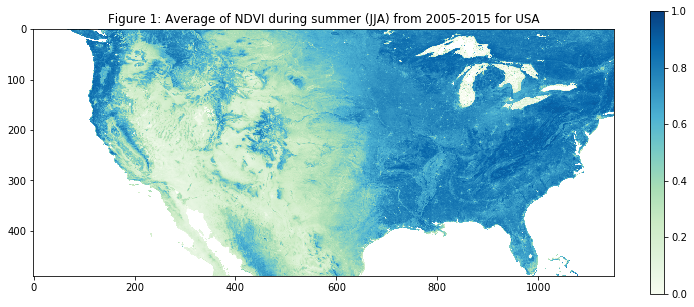

In [4]:
# - print out a value in the ocean to check for masking
print(ndvi_data[0,0,0])

# - slicing USA region
ndvi_usa = ndvi_data[:,810:1300,1000:2150]

# - masking ocean values
ndvi_usa_masked = np.ma.masked_where(ndvi_usa == -0.3,ndvi_usa)

# - calculate monthly summer mean
ndvi_usa_mean = np.mean(ndvi_usa_masked,axis=0)

# - plotting             
plt.figure(figsize=(13,13))
plt.imshow(ndvi_usa_mean, vmin=0, vmax=1,cmap='GnBu')
plt.title('Figure 1: Average of NDVI during summer (JJA) from 2005-2015 for USA')
plt.colorbar(shrink=0.4)
plt.show() 
#print(ndvi_usa_masked[1,-1-1])
   



The figure 1 above shows the distribution of averaged summer monthly NDVI from 2005-2015 over mainland of USA. One can notice that the Eastern part has a higher value of NDVI than the Western part, except for the Northwest corner associated with Wasington state, where there exits a high range of mountains. Based on the definition of NDVI, one can refer that where we see higher values of NDVI, there should be more green vegatation/forest over these regions. Thus from this result, the average distribution of surface vegetation in the US over 10 years can be interpreted.

In [5]:
# - compute monthly trend using linear regression

# - write a function here

def linear_trend(array_usa):
# - create an array to save the slope    
    nlats, nlons = np.shape(array_usa)[1], np.shape(array_usa)[2]
    array_trend = np.zeros( (nlats, nlons) )

    # - X = time axis --> will be same for all grid cells
    nmonths = np.shape(array_usa)[0]
    X = np.arange(nmonths).reshape(-1,1)

    # - for loop over rows and cols
    for i in range(np.shape(array_usa)[1]): # - can also use np.arange or something like that...
        for j in range(np.shape(array_usa)[2]):

            # - continue if masked
            if np.ma.is_masked(array_usa[:,i,j]):
                array_trend[i,j] = np.nan
                continue

            # - set up y
            y = array_usa[:,i,j].reshape(-1,1)

            # - set up model
            lm = linear_model.LinearRegression()
            model = lm.fit(X, y)

            # - save slope coef to gpp_slope array
            array_trend[i,j] = model.coef_[0][0]
    return array_trend        


-2.5999836050835597e-34


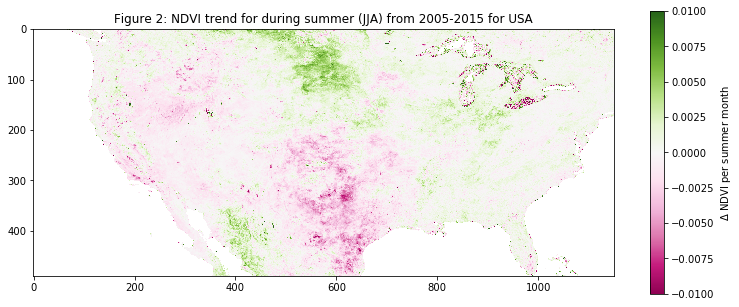

In [6]:
# - compute NDVI trend

ndvi_trend = linear_trend(ndvi_usa)

# - masking ocean values
print(ndvi_trend[0,0])
ndvi_trend_masked = np.ma.masked_where(ndvi_trend == -2.5999836050835597e-34,ndvi_trend)

# - plotting
plt.figure(figsize=(13,13))
plt.imshow(ndvi_trend_masked,vmin=-0.01,vmax=0.01,cmap='PiYG')
cbar = plt.colorbar(shrink=0.4)
cbar.set_label('$\Delta$ NDVI per summer month')

plt.title('Figure 2: NDVI trend for during summer (JJA) from 2005-2015 for USA')

plt.show()  
#print(ndvi_trend)

Figure 2 demonstrates how NDVI has changed from 2005-2015 during summer months. Obviously, Eastern part of the US mainland regions can be seen as having a increasing trend of NDVI during summer, which implies that more green vegetation types appear to thrive over time. Especially in Montana and a part of Wyoming where the NDVI show the biggest increasing trend. On the other hand, Western part of the US reveals to have a dcreasing trend, and Texas appears as an area with the biggest decresing trend. 

[318, 319, 320, 330, 331, 332, 342, 343, 344, 354, 355, 356, 366, 367, 368, 378, 379, 380, 390, 391, 392, 402, 403, 404, 414, 415, 416, 426, 427, 428]
0.06


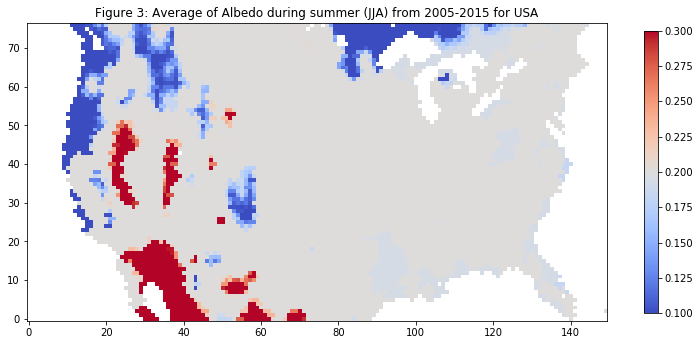

In [7]:
# - PROCESSING ALBEDO FROM NCEP DATA

# - open data
f = 'Data/NCEP/albedo.mon.mean.nc'
ncep_alb = nc.Dataset(f,'r')

# - getting data information
var_info = ncep_alb.variables
#print(var_info)

# - extract albedo variable and save to alb
alb = ncep_alb.variables['albedo'][:]

time = ncep_alb.variables['time'][:]
ncep_alb.close()

# - create a file that lists all the summer months from 2005-2015
# given that the data spans from 1979/01/01 to Nov 30, 2019, and has 490 timesteps.
# from 1979-2005, we have (2005-1979)*12 = 312 timesteps. Thus, all timesteps corresponding
# to summer months from 2005-2015 is saved into an array as followings
num1=318
num2=319
num3=320
sm_months = [318,319,320]
for i in range(1,10):
    num1=num1+12
    num2=num2+12
    num3=num3+12
    sm_months.append(num1)
    sm_months.append(num2)
    sm_months.append(num3)
print(sm_months)

# - create an array that consists of albedo of all summer months from 2005-2015
alb_sm = np.zeros((30,277,349))
for nf, f in enumerate(sm_months):
    alb_sm[nf,:,:] = alb[f,:,:]
    
# - slicing UAS region and get the actual albedo values by dividing by 100
alb_usa = alb_sm[:,70:147,120:270]/100  
print(alb_usa[0,1,1])

# - masking ocean values
alb_usa_masked = np.ma.masked_where(alb_usa == 0.06,alb_usa)    

# - calculate monthly summer mean
alb_usa_mean = np.mean(alb_usa_masked,axis=0)


# - plotting
plt.figure(figsize=(13,13))
plt.imshow(alb_usa_mean,vmin=0.1,vmax=0.3,cmap='coolwarm',origin='lower')
plt.title('Figure 3: Average of Albedo during summer (JJA) from 2005-2015 for USA')
plt.colorbar(shrink=0.4)
plt.show() 


Figure 3 shows the distribution of averaged summer monthly Albedo from 2005-2015. Based on a quick visualization, one can easily notice that the NCEP data is much coarser than MODIS data, as shown in the figure 1 and 2, which is consitent with the data description in the introduction. 

One can also see that most part of the US has the albedo value around 0.2, and the highest values are in the regions of New Mexico, Nevada, Utah, Arizona where there is mostly plain, desert, and least vegetation.

Therefore, albedo and NDVI has a reversed relation in wich high albedo is linked with low NDVI and vice versa.


6.499959012708899e-35


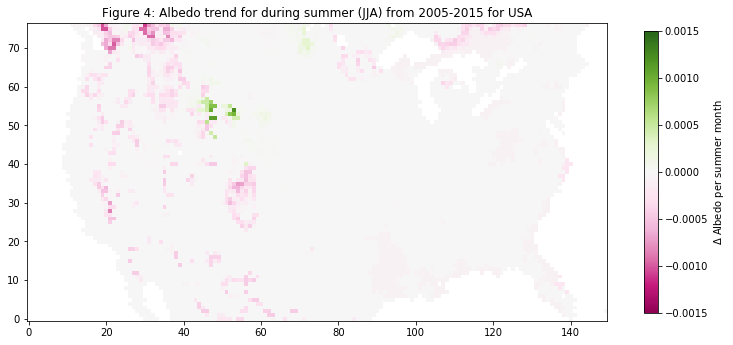

In [8]:
# - compute albedo trend

alb_trend = linear_trend(alb_usa)

# - masking ocean values
print(alb_trend[0,0])
alb_trend_masked = np.ma.masked_where(alb_trend == 6.499959012708899e-35,alb_trend)

# - plotting
plt.figure(figsize=(13,13))
plt.imshow(alb_trend_masked,vmin=-0.0015,vmax=0.0015,cmap='PiYG',origin='lower')
cbar = plt.colorbar(shrink=0.4)
cbar.set_label('$\Delta$ Albedo per summer month')

plt.title('Figure 4: Albedo trend for during summer (JJA) from 2005-2015 for USA')

plt.show() 

For albedo trend over these 10 years, it is just noticeable over the Western part of the US with a decresing trend. And there is just a small region showing a increasing trend in Wyoming, whereas the Eastern part of the US can be relatively considered unchanged with respect to albedo. 

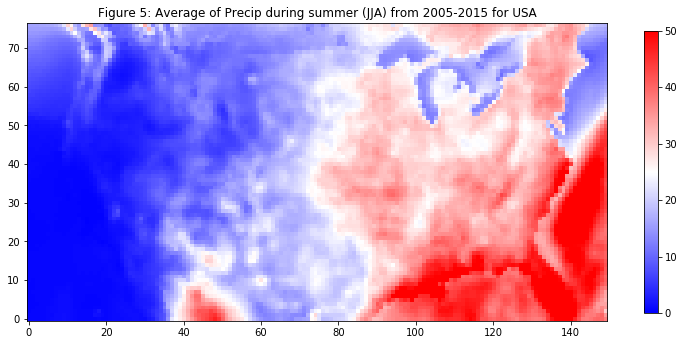

In [9]:
# - PROCESSING PRECIPITATION FROM NCEP DATA

# - open data
f = 'Data/NCEP/apcp.mon.mean.nc'
ncep_pcp = nc.Dataset(f,'r')

# - getting data information
var_info = ncep_pcp.variables
#print(var_info)

# - extract precip variable and save to pcp
pcp = ncep_pcp.variables['apcp'][:]
ncep_pcp.close()

# - create an array that consists of precip of all summer months from 2005-2015
pcp_sm = np.zeros((30,277,349))
for nf, f in enumerate(sm_months):
    pcp_sm[nf,:,:] = pcp[f,:,:]*10
    
# - slicing UAS region 
pcp_usa = pcp_sm[:,70:147,120:270]
 

# - calculate monthly summer mean
pcp_usa_mean = np.mean(pcp_usa,axis=0)


# - plotting
plt.figure(figsize=(13,13))
#plt.imshow(pcp_usa_masked[2,:,:]-alb_usa_masked[0,:,:],origin='lower')
plt.imshow(pcp_usa_mean,vmin=0,vmax=50,cmap='bwr',origin='lower')
plt.title('Figure 5: Average of Precip during summer (JJA) from 2005-2015 for USA')
plt.colorbar(shrink=0.4)
plt.show()


This figure highlights the distribution of average of monthly accumulated rainfall during summer over these 10 years. Again, the difference between the Eastern and Western parts of the US is observable. The Eastern parts show a clear higher amount of rainfall than the Western part because of higher frequnce of TC landings during summer. Florida appears to have the biggest amount of rainfall during this period. In contrast, the coastal western part of US such as California has the smallest amount of rainfall.

In short, all NDVI, albedo, and precipitation show clearly a substantial discrepancy between the Eastern and Western parts of the US. It is partially due to the differences in surface vegetation, and hurricane climatology. 


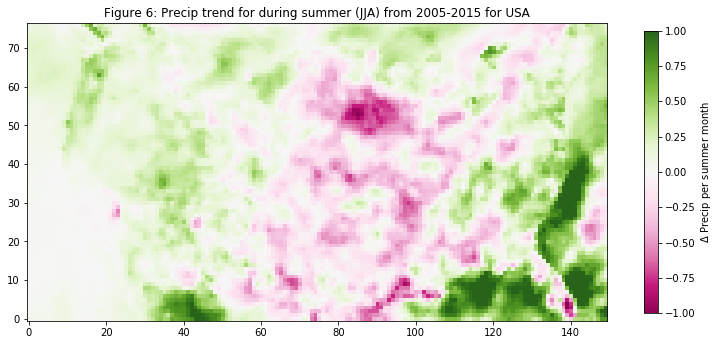

In [10]:
# - compute precip trend

pcp_trend = linear_trend(pcp_usa)


# - plotting
plt.figure(figsize=(13,13))
plt.imshow(pcp_trend,cmap='PiYG',vmin = -1, vmax = 1,origin='lower')
cbar = plt.colorbar(shrink=0.4)
cbar.set_label('$\Delta$ Precip per summer month')

plt.title('Figure 6: Precip trend for during summer (JJA) from 2005-2015 for USA')

plt.show() 

Looking at the precipitation trend, one can see that the increasing trend displays at the Western part, Gulf of Mexico and the coast along the East side of the US, while the decresing trend can be seen over the mid-west and Southern part of the country.

30
30
30
Statistical values of ndvi-alb
slope, intercept, rvalue, pvalue, stderr
-0.5696757412107355 0.9477020221242619 -0.3620035602201429 0.049324719878142714 0.27722610146735094
 
Statistical values of ndvi-pcp
slope, intercept, rvalue, pvalue, stderr
-0.00874034952728032 0.43542323157405327 -0.009766881010606214 0.9591474970509457 0.16911151215971287
 
Statistical values of alb-pcp
slope, intercept, rvalue, pvalue, stderr
0.16955164898548325 0.32135297421637254 0.29815630561375533 0.10952784998829712 0.10258000088947752
 


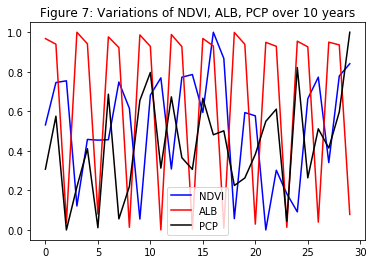

In [15]:
# - COMPUTE CORRELATION

# - import minmax_scale function from sklearn
from sklearn.preprocessing import minmax_scale

# - scale data using minmax_scale 
ndvi_usa_scaled = minmax_scale(np.mean(np.mean(ndvi_usa, axis=1), axis=1))
alb_usa_scaled = minmax_scale(np.mean(np.mean(alb_usa, axis=1), axis=1))
pcp_usa_scaled = minmax_scale(np.mean(np.mean(pcp_usa, axis=1), axis=1))

# - plotting scalled data for 3 vars
plt.figure()
plt.plot(ndvi_usa_scaled, label = 'NDVI', c='blue')
plt.plot(alb_usa_scaled, label = 'ALB', c='red')
plt.plot(pcp_usa_scaled, label = 'PCP', c='black')
plt.title('Figure 7: Variations of NDVI, ALB, PCP over 10 years')
plt.legend()


# - compute correlation values
import scipy.stats as sstats
print(len(ndvi_usa_scaled))
print(len(alb_usa_scaled))
print(len(pcp_usa_scaled))

# - fit model and print values
slope, intercept, rvalue, pvalue, stderr = sstats.linregress(ndvi_usa_scaled, alb_usa_scaled)
print('Statistical values of ndvi-alb')
print('slope, intercept, rvalue, pvalue, stderr')
print(slope, intercept, rvalue, pvalue, stderr)
print(' ')

slope, intercept, rvalue, pvalue, stderr = sstats.linregress(ndvi_usa_scaled, pcp_usa_scaled)
print('Statistical values of ndvi-pcp')
print('slope, intercept, rvalue, pvalue, stderr')
print(slope, intercept, rvalue, pvalue, stderr)
print(' ')

slope, intercept, rvalue, pvalue, stderr = sstats.linregress(alb_usa_scaled, pcp_usa_scaled)
print('Statistical values of alb-pcp')
print('slope, intercept, rvalue, pvalue, stderr')
print(slope, intercept, rvalue, pvalue, stderr)
print(' ')
                                                             

From these statistical values, NDVI and Albedo have a strong negative correlation, which is true and consistent with discussion above. NDVI and precipitation over the USA during summer months from 2005-2015 seem to have a low correlation as rvalue is so small. Albedo and precipitation, on the other hand, have a fairly strong positive correlation with r-value is 0.32 and slope is 0.1695.

Therefore, albedo appears to have a good relation with precipitation over USA during this period of time. As a result, future analysis to further quantify the relation between albedo and precipitation in USA can be implemented, and albedo values can be used as a predictor for rainfall prediction. 

### Conclusion

In this project, albedo, NDVI, and precipitation are three choosen variables in order to investigate the relationhips among them during summer months from 2005-2015 in the USA. Their summer monthly trends are also exammined. Both MODIS satellite and NCEP reanalysis NARR are utilized. Python is the main programming language to process and compute statistical analysis, with some specific libraries and functions such as numpy, NetCDF4, matplotlib.pyplot, gdal, glob, sklearn, scipy.stats. 

The results show that there is a obvious difference between the Eastern and Western parts of US for all three variables during this period of time. More specifically, Eastern part seems to have higher values of all three variables as compared to the Western part, probably due to vegetation distribution and hurricane climatology. In addition, statistical analysis demonstrates that NDVI and albedo have a strong negative correlation r-value is -0.56 and slope is 0.97, and NDVI and precipitation do not seem to have a strong correlation, whereas albedo and precipitation have a relatively strong positive correlation with r-value is 0.32 and slope is 0.1695. Based on these findings, it is recommended that albedo trend can be applied to investigate rainfall changes.

Finally, some challenges of this project are listed. First, datasets are huge and take a lot of space so I needed to dowload on Kasrt machine. Second, when multiple files are read with glob, we need to add 'sorted' before parentheses so that files will be read in order of alphabet. Third, since MODIS and NCEP have different format file names, and I also wanted to do analysis with summer months only, I needed to be creative in a way to choose exact summer months. Fourth, it was a bit tricky to mask ocean values since each variable has distinct masked values, so I printed out a value at the corner to determine ocean value and use it to mask. Last, when I plotted results with NCEP data, I had to put "origin='lower'" into plt.imshow such that it can display the domain properly.


### References

Fuller, D. O. and Ottke, C., Land cover, rainfall and land-surface albedo in west Africa. Climatic
Change, 2002. 54(1): 181-204.

Ichii, K., Kawabata, A., and Yamaguchi, Y., Global correlation analysis for NDVI and climatic
variables and NDVI trends: 1982-1990. International Journal of Remote Sensing, 2002. 23(18):
3873-3878.

Kang, S. M. and Held, I. M., Tropical precipitation, SSTs and the surface energy budget: a
zonally symmetric perspective. Climate Dynamics, 2012. 38(9): 1917-1924.

Wang, J., Rich, P. M., and Price, K. P., Temporal responses of NDVI to precipitation and
temperature in the central Great Plains, USA. International Journal of Remote Sensing, 2003.
24(11): 2345-2364.

Zhang, J., et al., The influence of vegetation cover on summer precipitation in China: A
statistical analysis of NDVI and climate data. Advances in Atmospheric Sciences, 2003. 20(6):
1002.